# IR Practical No.-5
                            

Implement Page Rank Algorithm. (Use python or beautiful soup for implementation).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
G = nx.DiGraph()

In [3]:
edges = [
    (1, 2), (1, 3),
    (2, 3), (2, 4),
    (3, 1), (4, 3),
    (4, 5), (5, 4),
    (5, 6), (6, 3)
]
G.add_edges_from(edges)

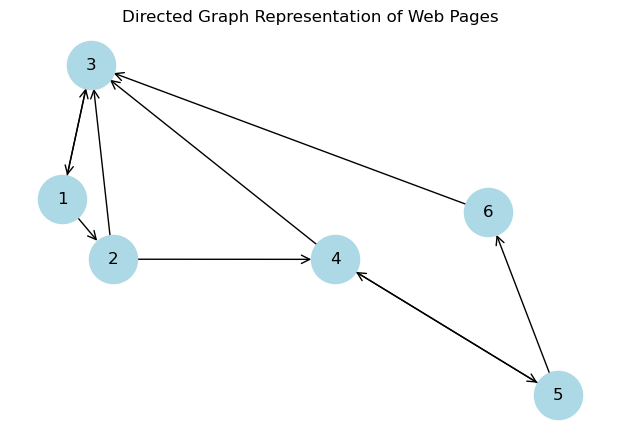

In [4]:
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=1200, arrows=True, arrowstyle="->", arrowsize=15)
plt.title("Directed Graph Representation of Web Pages")
plt.show()

In [5]:
pagerank_values = nx.pagerank(G, alpha=0.85)

In [6]:
print("PageRank values of each node:\n")
for node, rank in pagerank_values.items():
    print(f"Node {node}: {rank:.6f}")

PageRank values of each node:

Node 1: 0.288676
Node 2: 0.147687
Node 3: 0.310206
Node 4: 0.120082
Node 5: 0.076035
Node 6: 0.057315


In [7]:
sorted_pr = dict(sorted(pagerank_values.items(), key=lambda x: x[1], reverse=True))
print("\nNodes sorted by importance (highest PageRank first):")
for node, rank in sorted_pr.items():
    print(f"Node {node} --> {rank:.6f}")



Nodes sorted by importance (highest PageRank first):
Node 3 --> 0.310206
Node 1 --> 0.288676
Node 2 --> 0.147687
Node 4 --> 0.120082
Node 5 --> 0.076035
Node 6 --> 0.057315


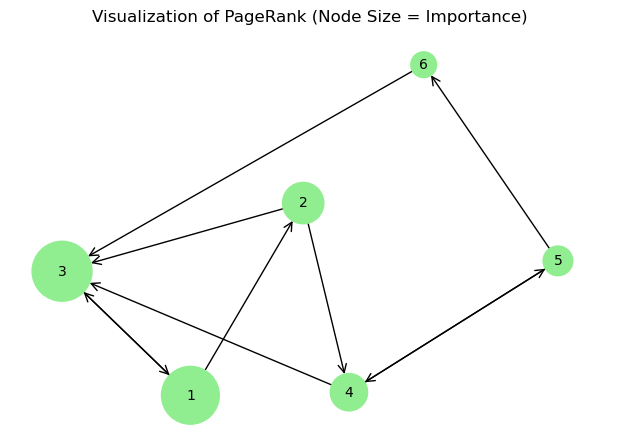

In [8]:
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True,
        node_color="lightgreen",
        node_size=[v * 6000 for v in pagerank_values.values()],
        font_size=10, arrows=True, arrowstyle="->", arrowsize=15)
plt.title("Visualization of PageRank (Node Size = Importance)")
plt.show()


In [9]:
# Yes, I understand the provided Jupyter Notebook code. It implements the **PageRank Algorithm** using the Python library **NetworkX**.

# Here is a detailed explanation of the code, the PageRank concept, and potential questions your instructor might ask, 
# which should help you prepare for your practical exam.

# -----

# ## 🧐 PageRank Algorithm: Core Concepts

# The PageRank algorithm, developed by Google founders Larry Page and Sergey Brin, is used to measure the 
# **importance** of web pages (or nodes) in a hyperlink graph.

# ### 1\. The Analogy of Importance

#   * A page is considered **important** if other important pages link to it.
#   * A link from an important page is **more valuable** than a link from a less important page.

# ### 2\. The Random Surfer Model

# PageRank models a hypothetical **"random surfer"** who clicks on links:

#   * With probability $\alpha$ (the **damping factor**), the surfer clicks on a random outgoing link from the current page.
#   * With probability $1 - \alpha$, the surfer gets bored and **jumps** to a completely random page in the entire web 
# (this prevents 'sinks'—pages with no outgoing links—from hoarding all the rank).

# ### 3\. The PageRank Formula

# The rank of a page $A$, $PR(A)$, is calculated iteratively:

# $$PR(A) = (1 - \alpha) \frac{1}{N} + \alpha \sum_{i \to A} \frac{PR(i)}{L(i)}$$

# Where:

#   * $N$: Total number of pages (nodes).
#   * $\alpha$: **Damping Factor** (typically set to **0.85** in practice, as in your code).
#   * $1/N$: The baseline probability of a random jump to any page (the "teleportation" term).
#   * $\sum_{i \to A}$: The sum is over all pages $i$ that link to page $A$.
#   * $PR(i)$: The current PageRank of the linking page $i$.
#   * $L(i)$: The number of outgoing links (out-degree) from page $i$. 
#   This term ensures that a page's rank is distributed equally among all the pages it links to.

# -----

# ## 💻 Explanation of the Provided Python Code

# The code successfully sets up a directed graph and calculates PageRank using NetworkX.

# ### 1\. Setup and Graph Creation

# | Code Segment | Explanation |
# | :--- | :--- |
# | `import networkx as nx` | Imports the **NetworkX** library, essential for creating, manipulating, and analyzing graph structures. |
# | `import matplotlib.pyplot as plt` | Imports **Matplotlib** for visualizing the graph. |
# | `G = nx.DiGraph()` | Creates a **Directed Graph** object named `G`. Directed means the links (edges) have a specific direction 
# (e.g., from page 1 to page 2, but not necessarily vice-versa), which is crucial for PageRank. |
# | `edges = [...]`<br>`G.add_edges_from(edges)` | Defines the links between pages (nodes).
# For example, `(1, 2)` means there is a link **from Node 1 to Node 2**. The graph has 6 nodes (1 through 6). |

# ### 2\. Graph Visualization (Figure 1)

# | Code Segment | Explanation |
# | :--- | :--- |
# | `nx.draw(...)` | Uses NetworkX's drawing function to visualize the graph. Arrows indicate the direction of the links 
# (e.g., 3 links to 1, but 1 links to 2 and 3). |

# ### 3\. PageRank Calculation

# | Code Segment | Explanation |
# | :--- | :--- |
# | `pagerank_values = nx.pagerank(G, alpha=0.85)` | This is the core calculation. 
# It calls NetworkX's built-in PageRank function: <br> \* `G`: The directed graph. <br> \* `alpha=0.85`: Sets the **damping factor**
# to the standard value of 0.85. |

# ### 4\. Output and Sorting

# | Code Segment | Explanation |
# | :--- | :--- |
# | `for node, rank in pagerank_values.items():`<br>`print(f"Node {node}: {rank:.6f}")` | Prints the calculated PageRank value for each node (page). |
# | `sorted_pr = dict(sorted(...))` | Sorts the calculated PageRank values in **descending order** (highest rank first). |
# | `for node, rank in sorted_pr.items():`<br>`print(f"Node {node} --> {rank:.6f}")` | Prints the final ranking, showing the 
# **most important** page first. |

# ### 5\. Visualization with PageRank Importance (Figure 2)

# | Code Segment | Explanation |
# | :--- | :--- |
# | `node_size=[v * 6000 for v in pagerank_values.values()]` | This is a key line for visualization. 
# It scales the size of each node in the drawing based on its calculated PageRank value (`v`). **Larger nodes = Higher PageRank = More Important.** |

# ### **Results Summary**

# Based on the output, **Node 3** is the most important page (`0.310206`), followed by **Node 1** (`0.288676`).

# | Node | PageRank | Why? (Look at the graph) |
# | :--- | :--- | :--- |
# | **3** | **0.310206 (Highest)** | **Receives links** from important nodes (1, 2, 4, 6) and has a low out-degree to dilute its rank. |
# | **1** | 0.288676 | **Receives a link** from the most important node (3). |
# | 6 | 0.057315 (Lowest) | Only receives a link from Node 5. |

# -----

# ## ❓ Potential Exam Questions and Answers

# ### **1. Core Concept Questions**

#   * **Q: What is the primary purpose of the PageRank algorithm?**
#       * **A:** To determine the **relative importance** or rank of nodes 
#       (web pages) in a directed graph structure based on the quantity and quality of links pointing to them.
#   * **Q: How does PageRank define an "important" page?**
#       * **A:** An important page is one that is linked to by **many** other pages, and more crucially,
#       is linked to by **other pages that are themselves important**.
#   * **Q: Explain the role of the damping factor ($\alpha$). What value did you use and why?**
#       * **A:** The damping factor ($\alpha$), typically $\mathbf{0.85}$, represents the probability that a random surfer will 
#       **continue clicking** on a link. The $1-\alpha$ portion (0.15) is the probability the surfer will **jump** to a random page. 
#       It ensures the algorithm always converges, even if the graph has "dead ends" (pages with no outgoing links).
#   * **Q: What is a `DiGraph` and why is it used here instead of a simple `Graph`?**
#       * **A:** A `DiGraph` is a **Directed Graph**. It's used because a hyperlink is a one-way connection (from page A to page B),
#       and PageRank calculations **depend on the direction** of the links (in-links vs. out-links).

# ### **2. Code-Specific Questions**

#   * **Q: Which Python library is used for graph creation and PageRank calculation in your code?**
#       * **A:** The **NetworkX** library.
#   * **Q: In the edges list, what does `(4, 5)` represent?**
#       * **A:** It represents a directed link (hyperlink) **from Node 4 to Node 5**.
#   * **Q: Looking at the output, which node is the most important and how can you tell from the visualization?**
#       * **A:** **Node 3** is the most important, with a PageRank of `0.310206`. In the second visualization figure, you can tell because 
#       **Node 3 has the largest size**, as the node size is scaled by its PageRank value.
#   * **Q: What does the line `node_size=[v * 6000 for v in pagerank_values.values()]` achieve?**
#       * **A:** It calculates the size for each node in the visualization by multiplying its PageRank value (`v`) by 6000. 
#       This makes the **visual size of the node directly proportional to its calculated importance (PageRank)**, providing an intuitive visual 
#       representation.

# ### **3. Advanced/Conceptual Questions**

#   * **Q: How do links *from* a page and links *to* a page affect PageRank differently?**
#       * **A:** **Links *to* a page (in-links) increase its rank.** The more in-links, the higher the rank. **Links *from* a page (out-links)
#       dilute its rank.** If a page has a high rank but links to 100 other pages, it distributes its rank among all of them, giving each one a 
#       smaller share.
#   * **Q: What is the main problem the $1-\alpha$ term (the random jump) in PageRank solves?**
#       * **A:** It solves the problems of **"dead ends" (or sinks)** and **"rank sinks"**. A dead end is a page with no outgoing links; 
#       without the random jump, the rank flows into this page and gets trapped. The random jump ensures that rank is recirculated throughout 
#       the entire graph.
#   * **Q: Why do the PageRank values sum to 1?**
#       * **A:** PageRank is essentially a **probability distribution**. It represents the long-term probability of a random surfer being on any 
#       given page. Since the surfer must be on *some* page, the sum of all PageRank values across the entire graph must equal 1.